In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error

In [2]:
df=pd.read_csv('/content/mhealth_raw_data.csv')
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [3]:
from sklearn.utils import resample

df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]  #Reduces the majority class (Activity == 0) to 30,000 samples using resample.

df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts() #Combines the downsampled majority class with the minority classes

,count
Activity,
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720
0,30000


In [4]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 373195 entries, 154060 to 1213645
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       373195 non-null  float64
 1   aly       373195 non-null  float64
 2   alz       373195 non-null  float64
 3   glx       373195 non-null  float64
 4   gly       373195 non-null  float64
 5   glz       373195 non-null  float64
 6   arx       373195 non-null  float64
 7   ary       373195 non-null  float64
 8   arz       373195 non-null  float64
 9   grx       373195 non-null  float64
 10  gry       373195 non-null  float64
 11  grz       373195 non-null  float64
 12  Activity  373195 non-null  int64  
 13  subject   373195 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 42.7+ MB


In [5]:
# statistical information of every column
for column in df.columns:
    print(df[column].describe())
    print("\n----------------------------\n")

count    373195.000000
mean          1.769892
std           4.170916
min         -22.146000
25%           0.158585
50%           1.365300
75%           2.882800
max          20.044000
Name: alx, dtype: float64

----------------------------

count    373195.000000
mean         -9.129392
std           5.099059
min         -19.619000
25%         -10.078000
50%          -9.606500
75%          -7.729550
max          21.161000
Name: aly, dtype: float64

----------------------------

count    373195.000000
mean         -0.726522
std           6.352714
min         -19.373000
25%          -3.367750
50%           0.298640
75%           1.758900
max          25.015000
Name: alz, dtype: float64

----------------------------

count    373195.000000
mean          0.090064
std           0.463424
min          -1.894200
25%          -0.356220
50%           0.183670
75%           0.484230
max           1.794100
Name: glx, dtype: float64

----------------------------

count    373195.000000
mean         

<Axes: title={'center': 'Data Before sampling'}, xlabel='Activity'>

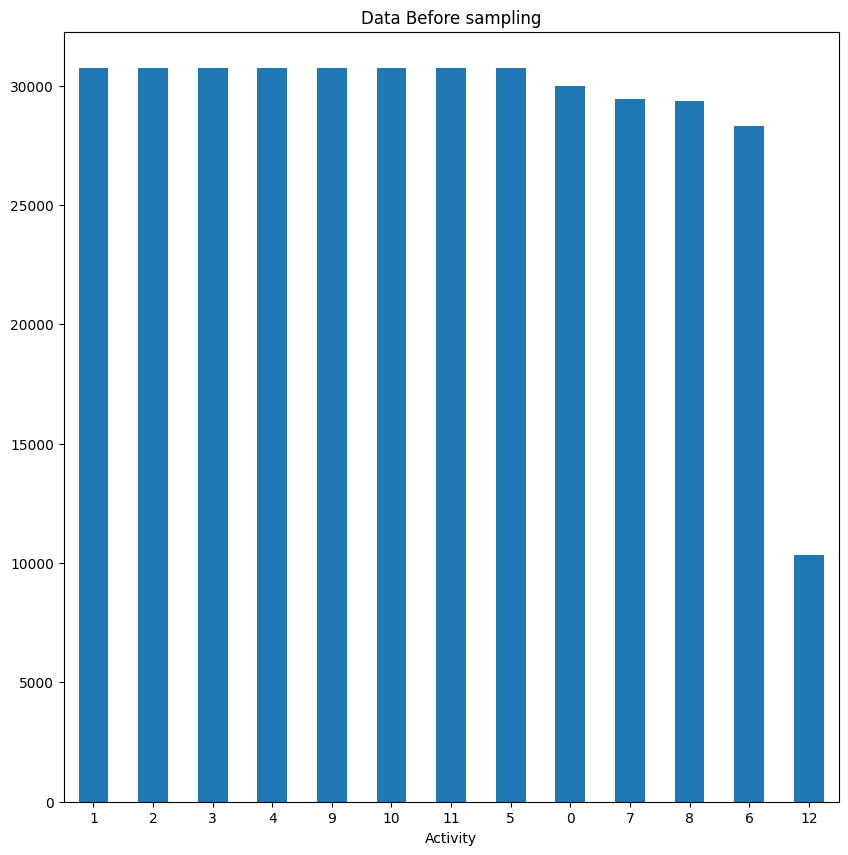

In [6]:
# We need to check data if there's imbalanced data or not

plt.figure(figsize=(10,10))
plt.title('Data Before sampling')
df['Activity'].value_counts().plot.bar(rot=0)

In [9]:
data_activity_0 = df[df['Activity'] == 0]
data_activity_else = df[df['Activity'] != 0]

data_activity_0 = data_activity_0.sample(n=40000, random_state=42,replace=True)
df = pd.concat([data_activity_0, data_activity_else])

<Axes: title={'center': 'Data afetr sampling'}, xlabel='Activity'>

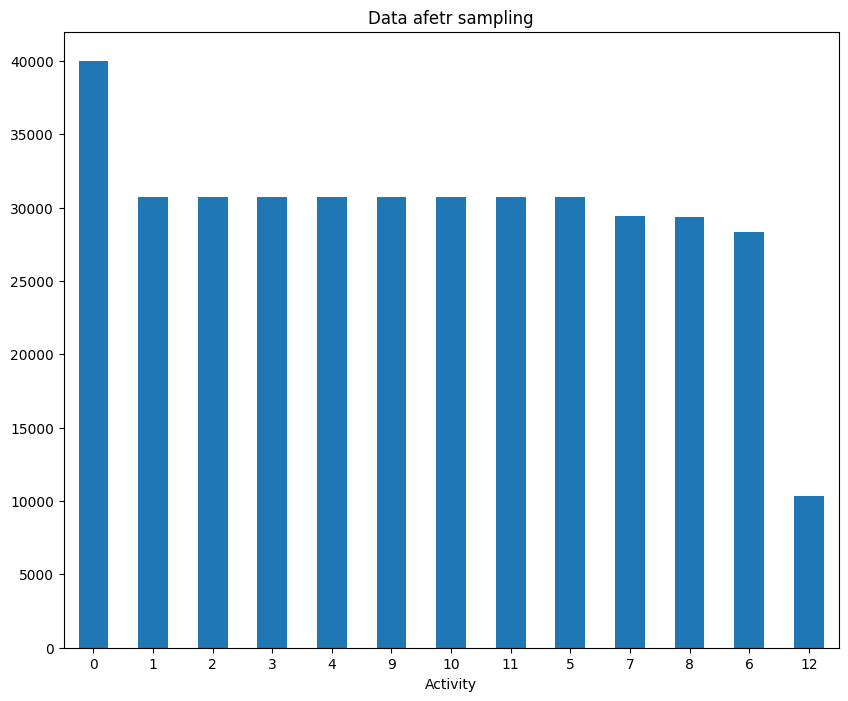

In [10]:
plt.figure(figsize=(10 ,8 ))
plt.title('Data afetr sampling')
df['Activity'].value_counts().plot.bar(rot=0)

In [11]:
activities_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

In [12]:
df


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
972177,1.55140,-9.5681,-1.36910,-0.54174,-0.83302,-0.357560,-8.1950,-1.4136,-6.36230,-0.36275,-0.88090,-0.545260,0,subject8
293729,0.38975,-7.8572,-2.55560,-0.66790,-0.81426,0.062868,-9.2601,3.8971,-5.29470,-0.38431,0.51335,-0.814660,0,subject3
585202,13.68100,-7.9228,-5.15520,-0.20594,-0.92871,-0.379170,4.2437,-8.4431,-0.30757,-0.34706,-1.02260,-0.269400,0,subject5
24750,2.60120,-9.3987,0.72274,0.24119,-0.58912,0.628680,-4.1413,-8.6408,0.92213,-0.80196,-0.52361,0.586210,0,subject1
617778,2.07230,-18.4670,-6.13180,-0.60111,-0.87617,0.003929,-2.6154,-5.8919,3.80960,-0.74118,-0.81520,0.247840,0,subject5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213641,-2.48730,-19.2330,3.46140,0.61967,-0.33771,-0.827110,-8.2348,-4.9652,2.48090,-0.43725,-1.01850,0.079741,12,subject10
1213642,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,-0.827110,-21.3180,-10.2130,3.65600,-0.43725,-1.01850,0.079741,12,subject10
1213643,7.54330,-19.2450,-2.66800,0.61967,-0.33771,-0.827110,-21.2970,-18.7050,4.46060,-0.43725,-1.01850,0.079741,12,subject10
1213644,3.01420,-19.3340,-7.70740,0.71058,-0.27017,-0.754420,-21.1380,-18.6980,1.15880,-0.42549,-1.03700,0.084052,12,subject10


In [13]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['None','Standing still (1 min)', 'Sitting and relaxing (1 min)', 'Lying down (1 min)', 'Walking (1 min)','Climbing stairs (1 min)','Waist bends forward (20x)','Frontal elevation of arms (20x)','Knees bending (crouching) (20x)','Cycling (1 min)','Jogging (1 min)','Running (1 min)','Jump front & back (20x)'])
df['Activity']


,Activity
972177,None
293729,None
585202,None
24750,None
617778,None
...,...
1213641,Jump front & back (20x)
1213642,Jump front & back (20x)
1213643,Jump front & back (20x)
1213644,Jump front & back (20x)


In [14]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
972177,1.55140,-9.5681,-1.36910,-0.54174,-0.83302,-0.357560,-8.1950,-1.4136,-6.36230,-0.36275,-0.88090,-0.54526,None,subject8
293729,0.38975,-7.8572,-2.55560,-0.66790,-0.81426,0.062868,-9.2601,3.8971,-5.29470,-0.38431,0.51335,-0.81466,None,subject3
585202,13.68100,-7.9228,-5.15520,-0.20594,-0.92871,-0.379170,4.2437,-8.4431,-0.30757,-0.34706,-1.02260,-0.26940,None,subject5
24750,2.60120,-9.3987,0.72274,0.24119,-0.58912,0.628680,-4.1413,-8.6408,0.92213,-0.80196,-0.52361,0.58621,None,subject1
617778,2.07230,-18.4670,-6.13180,-0.60111,-0.87617,0.003929,-2.6154,-5.8919,3.80960,-0.74118,-0.81520,0.24784,None,subject5


In [15]:
# As per we don't need Subject for traning our dataset . As this mention particular person

df=df.drop(columns=['subject'])

In [16]:
df.head()


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
972177,1.55140,-9.5681,-1.36910,-0.54174,-0.83302,-0.357560,-8.1950,-1.4136,-6.36230,-0.36275,-0.88090,-0.54526,None
293729,0.38975,-7.8572,-2.55560,-0.66790,-0.81426,0.062868,-9.2601,3.8971,-5.29470,-0.38431,0.51335,-0.81466,None
585202,13.68100,-7.9228,-5.15520,-0.20594,-0.92871,-0.379170,4.2437,-8.4431,-0.30757,-0.34706,-1.02260,-0.26940,None
24750,2.60120,-9.3987,0.72274,0.24119,-0.58912,0.628680,-4.1413,-8.6408,0.92213,-0.80196,-0.52361,0.58621,None
617778,2.07230,-18.4670,-6.13180,-0.60111,-0.87617,0.003929,-2.6154,-5.8919,3.80960,-0.74118,-0.81520,0.24784,None


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 383195 entries, 972177 to 1213645
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       383195 non-null  float64
 1   aly       383195 non-null  float64
 2   alz       383195 non-null  float64
 3   glx       383195 non-null  float64
 4   gly       383195 non-null  float64
 5   glz       383195 non-null  float64
 6   arx       383195 non-null  float64
 7   ary       383195 non-null  float64
 8   arz       383195 non-null  float64
 9   grx       383195 non-null  float64
 10  gry       383195 non-null  float64
 11  grz       383195 non-null  float64
 12  Activity  383195 non-null  object 
dtypes: float64(12), object(1)
memory usage: 40.9+ MB


We need to create Activity as numerical data to train it properly

In [18]:
labelencoder=LabelEncoder()
df['Activity']=labelencoder.fit_transform(df['Activity'])
df['Activity']

,Activity
972177,7
293729,7
585202,7
24750,7
617778,7
...,...
1213641,4
1213642,4
1213643,4
1213644,4


In [19]:
df['Activity'].unique()


array([ 7, 10,  9,  6, 12, 11,  2,  5,  1,  3,  8,  4,  0])

We need to Standardize the data

In [20]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
972177,1.55140,-9.5681,-1.36910,-0.54174,-0.83302,-0.357560,-8.1950,-1.4136,-6.36230,-0.36275,-0.88090,-0.545260,7
293729,0.38975,-7.8572,-2.55560,-0.66790,-0.81426,0.062868,-9.2601,3.8971,-5.29470,-0.38431,0.51335,-0.814660,7
585202,13.68100,-7.9228,-5.15520,-0.20594,-0.92871,-0.379170,4.2437,-8.4431,-0.30757,-0.34706,-1.02260,-0.269400,7
24750,2.60120,-9.3987,0.72274,0.24119,-0.58912,0.628680,-4.1413,-8.6408,0.92213,-0.80196,-0.52361,0.586210,7
617778,2.07230,-18.4670,-6.13180,-0.60111,-0.87617,0.003929,-2.6154,-5.8919,3.80960,-0.74118,-0.81520,0.247840,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213641,-2.48730,-19.2330,3.46140,0.61967,-0.33771,-0.827110,-8.2348,-4.9652,2.48090,-0.43725,-1.01850,0.079741,4
1213642,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,-0.827110,-21.3180,-10.2130,3.65600,-0.43725,-1.01850,0.079741,4
1213643,7.54330,-19.2450,-2.66800,0.61967,-0.33771,-0.827110,-21.2970,-18.7050,4.46060,-0.43725,-1.01850,0.079741,4
1213644,3.01420,-19.3340,-7.70740,0.71058,-0.27017,-0.754420,-21.1380,-18.6980,1.15880,-0.42549,-1.03700,0.084052,4


In [21]:
x=df.iloc[:,:12]    #till 12
y=df.iloc[:,12]     #excpet 12

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)
y_train

,Activity
543174,6
187112,7
562079,2
822705,1
832244,3
...,...
359034,7
211279,9
349079,1
554200,7


linear regression

In [22]:
from sklearn.linear_model import LinearRegression
linearreg=LinearRegression()

In [23]:
linearreg.fit(x_train,y_train)
y_pred_linearreg = linearreg.predict(x_test)
y_pred_linearreg=y_pred_linearreg.round(0)
y_pred_linearreg                              #predict the y test value

array([6., 8., 6., ..., 6., 7., 8.])

In [38]:
import seaborn as sns
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')
    plt.figure(figsize=(13, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activities_label.values(),
                yticklabels=activities_label.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))

In [35]:
from sklearn.metrics import classification_report
resultsSummarizer(y_test, y_pred_linearreg)

Accuracy Score: 7.8926%
Precision Score: 6.5567%
Recall Score: 6.6795%
F_1 Score: 4.0401%
Sensitvity: 6.6795%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


knn

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k1=KNeighborsClassifier(n_neighbors=6)
k1.fit(x_train,y_train)
# k1.score(x_train,y_train)
y_pred=k1.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
999244,9,9
870110,7,7
1066897,8,8
810122,11,11
460539,9,9
761121,0,0
1094678,7,7
411322,0,0
318963,12,12
824303,1,1


In [37]:
resultsS3ummarizer(y_test, y_pred)

Accuracy Score: 95.3611%
Precision Score: 95.2665%
Recall Score: 95.3183%
F_1 Score: 95.1076%
Sensitvity: 95.3183%
